In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
# import os
# import pandas as pd
# from tqdm import tqdm
# import librosa
# import numpy as np

# def create_mfcc_dataframe(real_folder_path, fake_folder_path):
#     # Function to extract MFCC features
#     def features_extractor(file):
#         audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
#         mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
#         mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
#         return mfccs_scaled_features

#     # Function to iterate through folder and extract features
#     def iterate_folder_and_extract_features(folder_path, label):
#         extracted_features = []
#         for file_name in tqdm(os.listdir(folder_path)):
#             file_path = os.path.join(folder_path, file_name)
#             if file_path.endswith(".wav"):  # Assuming the audio files are in WAV format
#                 data = features_extractor(file_path)
#                 extracted_features.append([data, label])
#         return extracted_features

#     # Extract features for real audios
#     real_features = iterate_folder_and_extract_features(real_folder_path, label="real")

#     # Extract features for fake audios
#     fake_features = iterate_folder_and_extract_features(fake_folder_path, label="fake")

#     # Combine real and fake features
#     all_features = real_features + fake_features

#     # Create DataFrame
#     df = pd.DataFrame(all_features, columns=["mfcc_features", "label"])

#     return df

In [3]:
# real_folder_path = 'C:/Users/aa/Desktop/generated_audio/generated_audio/data set all/real'
# fake_folder_path = 'C:/Users/aa/Desktop/generated_audio/generated_audio/data set all/fake'

# df = create_mfcc_dataframe(real_folder_path, fake_folder_path)


# df_expanded = pd.DataFrame(df['mfcc_features'].tolist())

# # Combine the expanded MFCC columns with the original DataFrame
# df_expanded = pd.concat([df[['label']], df_expanded], axis=1)


# df_expanded.to_csv("C:\\Users\\aa\\Downloads\\100newneww.csv",index=False)

In [4]:
# df_expanded

In [5]:
data_train = pd.read_csv("..\\data set final\\spliting data\\train part_1.csv")
#data_train_1 = pd.read_csv("..\\data set final\\spliting data\\train part_1.csv")
data_test= pd.read_csv("..\\data set final\\spliting data\\all_test.csv")
data_val= pd.read_csv("..\\data set final\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [6]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-308.643738,83.215111,2.954364,8.332104,-26.816509,-11.286063,-18.635324,-19.527489,-21.554918,...,-0.563854,-0.500548,-0.845772,-0.233547,-0.571065,-0.053734,-0.259196,-0.319193,-0.840743,-0.763966
1,fake,-310.996826,57.916641,25.628843,19.340755,-5.469358,-22.178640,-20.736998,-14.935734,-16.973501,...,0.040916,0.646060,-0.053480,0.573642,0.231950,0.255590,-0.005893,0.176042,-0.355937,-0.045967
2,fake,-306.295959,89.043877,-6.858664,3.503150,-16.578819,-16.020960,-21.935347,-18.716463,-20.753521,...,-0.522520,-0.361891,-0.192657,-0.209379,-0.070371,-0.050636,-0.413034,-0.434269,-0.744069,-0.815403
3,fake,-313.401459,63.778816,10.261693,18.548100,-13.508071,-21.944349,-24.997660,-19.249523,-15.355844,...,-0.570126,0.455397,-0.044332,-0.133767,0.141274,0.072082,-0.565503,-0.363769,-1.225913,-0.507618
4,fake,-303.068939,85.139900,7.263174,16.590250,-18.455631,-19.695097,-19.672819,-23.731651,-25.065147,...,0.248072,0.700632,0.029145,-0.399052,-0.318387,0.286265,0.390015,0.708596,-0.313497,-0.987726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-307.949341,73.341194,-0.011203,22.590006,-5.231878,-25.821758,-18.661371,-20.106800,-9.558134,...,0.141775,0.326266,-0.484401,0.232943,0.298812,0.163137,-0.377332,-0.194836,-0.470153,-0.021443
24995,fake,-298.159973,121.499588,-15.746637,-0.962346,-28.814501,-26.274719,-10.238943,-16.343975,-20.957354,...,-0.434092,-0.550544,-0.497057,-0.504804,-0.233996,-0.354015,-0.547836,-0.215049,-0.742854,-0.931509
24996,fake,-327.608704,89.776489,9.337836,10.826793,-18.552263,-25.378685,-20.079405,-13.260245,-10.857801,...,-0.694174,-0.460832,-0.227462,-0.651555,-0.368595,-0.548334,-0.751841,-0.593215,-0.650900,-0.773991
24997,fake,-294.966583,63.880108,-6.024673,7.978878,-19.311783,-23.558542,-22.865660,-26.126642,-24.293869,...,0.187397,-0.120622,-0.207929,-0.063349,-0.213974,0.145639,-0.085291,-0.062206,-0.554196,-0.125706


# Encoding

In [7]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-308.643738,83.215111,2.954364,8.332104,-26.816509,-11.286063,-18.635324,-19.527489,-21.554918,...,-0.563854,-0.500548,-0.845772,-0.233547,-0.571065,-0.053734,-0.259196,-0.319193,-0.840743,-0.763966
1,fake,-310.996826,57.916641,25.628843,19.340755,-5.469358,-22.178640,-20.736998,-14.935734,-16.973501,...,0.040916,0.646060,-0.053480,0.573642,0.231950,0.255590,-0.005893,0.176042,-0.355937,-0.045967
2,fake,-306.295959,89.043877,-6.858664,3.503150,-16.578819,-16.020960,-21.935347,-18.716463,-20.753521,...,-0.522520,-0.361891,-0.192657,-0.209379,-0.070371,-0.050636,-0.413034,-0.434269,-0.744069,-0.815403
3,fake,-313.401459,63.778816,10.261693,18.548100,-13.508071,-21.944349,-24.997660,-19.249523,-15.355844,...,-0.570126,0.455397,-0.044332,-0.133767,0.141274,0.072082,-0.565503,-0.363769,-1.225913,-0.507618
4,fake,-303.068939,85.139900,7.263174,16.590250,-18.455631,-19.695097,-19.672819,-23.731651,-25.065147,...,0.248072,0.700632,0.029145,-0.399052,-0.318387,0.286265,0.390015,0.708596,-0.313497,-0.987726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-307.949341,73.341194,-0.011203,22.590006,-5.231878,-25.821758,-18.661371,-20.106800,-9.558134,...,0.141775,0.326266,-0.484401,0.232943,0.298812,0.163137,-0.377332,-0.194836,-0.470153,-0.021443
24995,fake,-298.159973,121.499588,-15.746637,-0.962346,-28.814501,-26.274719,-10.238943,-16.343975,-20.957354,...,-0.434092,-0.550544,-0.497057,-0.504804,-0.233996,-0.354015,-0.547836,-0.215049,-0.742854,-0.931509
24996,fake,-327.608704,89.776489,9.337836,10.826793,-18.552263,-25.378685,-20.079405,-13.260245,-10.857801,...,-0.694174,-0.460832,-0.227462,-0.651555,-0.368595,-0.548334,-0.751841,-0.593215,-0.650900,-0.773991
24997,fake,-294.966583,63.880108,-6.024673,7.978878,-19.311783,-23.558542,-22.865660,-26.126642,-24.293869,...,0.187397,-0.120622,-0.207929,-0.063349,-0.213974,0.145639,-0.085291,-0.062206,-0.554196,-0.125706


In [8]:
count = data_train['label'].value_counts()
print(count)


fake    21642
real     3357
Name: label, dtype: int64


In [9]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [10]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [11]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
24994,1,0
24995,1,0
24996,1,0
24997,1,0


In [12]:
# ### Train Test Split
# from sklearn.model_selection import train_test_split
# X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True, stratify=y)
# X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,shuffle=True, stratify=y_temp)

In [13]:
X_train.shape

(24999, 100)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
782/782 [==============================] - 11s 11ms/step - loss: 0.3787 - accuracy: 0.8694 - val_loss: 0.3155 - val_accuracy: 0.8898
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 0.2580 - accuracy: 0.9038 - val_loss: 0.2018 - val_accuracy: 0.9190
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.1859 - accuracy: 0.9262 - val_loss: 0.1523 - val_accuracy: 0.9373
Epoch 4/20
782/782 [==============================] - 8s 11ms/step - loss: 0.1424 - accuracy: 0.9416 - val_loss: 0.1128 - val_accuracy: 0.9553
Epoch 5/20
782/782 [==============================] - 8s 11ms/step - loss: 0.1251 - accuracy: 0.9494 - val_loss: 0.1146 - val_accuracy: 0.9553
Epoch 6/20
782/782 [==============================] - 8s 11ms/step - loss: 0.1154 - accuracy: 0.9538 - val_loss: 0.1188 - val_accuracy: 0.9542
Epoch 7/20
782/782 [==============================] - 8s 11ms/step - loss: 0.1144 - accuracy: 0.9522 - val_loss: 0.1076 - val_accuracy: 0.954

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 2s - loss: 0.0529 - accuracy: 0.9807 - 2s/epoch - 4ms/step
Test Accuracy: 98.07%


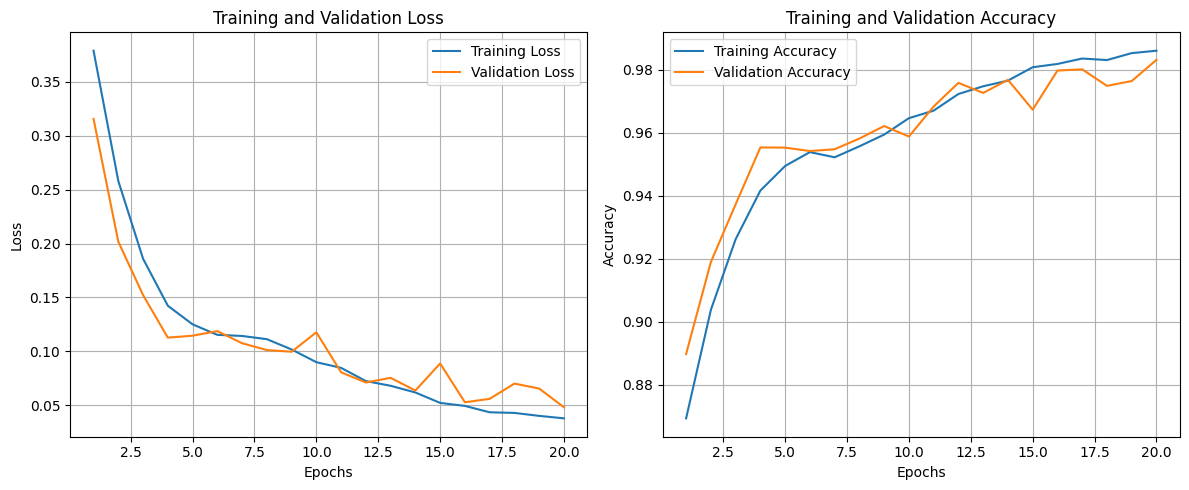

In [16]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [17]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


489/489 [==============================] - 2s 3ms/step


In [18]:
y_test

,fake,real
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
15619,0,1
15620,1,0
15621,1,0
15622,1,0


In [19]:
y_ture=np.argmax(y_test.values, axis=1)


In [20]:
y_ture

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Test f1_score : 92.63%


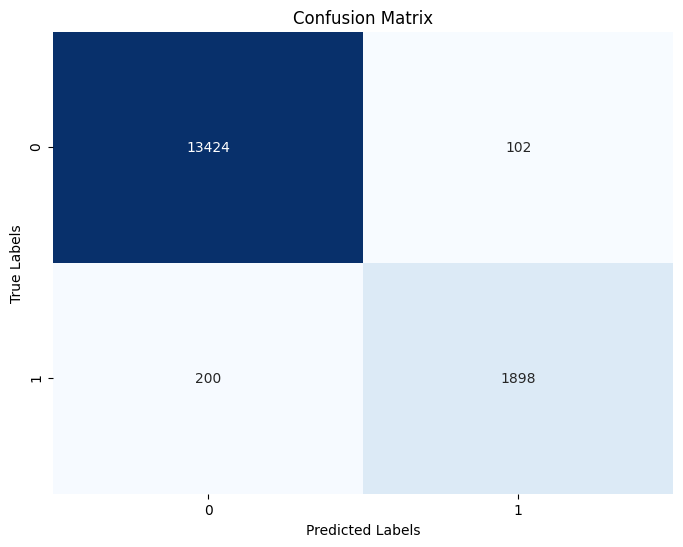

In [21]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
y_pred_classes

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
y_test

,fake,real
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
15619,0,1
15620,1,0
15621,1,0
15622,1,0


# part 2

In [24]:

data_train_2 = pd.read_csv("..\\data set final\\spliting data\\train part_2.csv")
data_train_2 = data_train_2.sample(frac=1).reset_index(drop=True)

data_train=pd.concat([data_train, data_train_2], axis=0)

In [25]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-308.643738,83.215111,2.954364,8.332104,-26.816509,-11.286063,-18.635324,-19.527489,-21.554918,...,-0.563854,-0.500548,-0.845772,-0.233547,-0.571065,-0.053734,-0.259196,-0.319193,-0.840743,-0.763966
1,fake,-310.996826,57.916641,25.628843,19.340755,-5.469358,-22.178640,-20.736998,-14.935734,-16.973501,...,0.040916,0.646060,-0.053480,0.573642,0.231950,0.255590,-0.005893,0.176042,-0.355937,-0.045967
2,fake,-306.295959,89.043877,-6.858664,3.503150,-16.578819,-16.020960,-21.935347,-18.716463,-20.753521,...,-0.522520,-0.361891,-0.192657,-0.209379,-0.070371,-0.050636,-0.413034,-0.434269,-0.744069,-0.815403
3,fake,-313.401459,63.778816,10.261693,18.548100,-13.508071,-21.944349,-24.997660,-19.249523,-15.355844,...,-0.570126,0.455397,-0.044332,-0.133767,0.141274,0.072082,-0.565503,-0.363769,-1.225913,-0.507618
4,fake,-303.068939,85.139900,7.263174,16.590250,-18.455631,-19.695097,-19.672819,-23.731651,-25.065147,...,0.248072,0.700632,0.029145,-0.399052,-0.318387,0.286265,0.390015,0.708596,-0.313497,-0.987726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-310.452423,85.444496,-11.987648,13.620821,-14.554655,-26.424091,-19.037254,-20.566439,-18.421122,...,-0.207732,0.127558,0.164898,0.295602,0.125873,0.345417,0.017560,-0.254430,-0.297158,-0.034296
24995,fake,-290.247192,80.492081,-2.227448,18.918758,-18.252552,-27.034311,-20.826059,-20.444099,-17.570845,...,-1.091644,-0.341046,-0.524028,-0.554921,-0.714462,-0.243300,-1.033801,-0.175249,-0.211907,-0.258006
24996,fake,-310.411530,72.608887,9.135739,18.829180,-19.259115,-17.706219,-15.571314,-22.566620,-21.885599,...,0.186102,0.456792,0.071878,-0.195496,-0.683748,-0.146887,0.582696,0.745767,-0.149510,-0.729513
24997,fake,-317.750214,76.046028,13.993079,27.859419,-17.100212,-21.951477,-17.170757,-20.372437,-12.617874,...,0.019588,0.495326,-0.002140,0.315873,0.278216,0.412057,-0.444024,0.036212,0.141976,-0.158790


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)



callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
1563/1563 [==============================] - 16s 9ms/step - loss: 0.3723 - accuracy: 0.8699 - val_loss: 0.3574 - val_accuracy: 0.8657
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3272 - accuracy: 0.8856 - val_loss: 0.3231 - val_accuracy: 0.8909
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2764 - accuracy: 0.8995 - val_loss: 0.1517 - val_accuracy: 0.9389
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1494 - accuracy: 0.9409 - val_loss: 0.0979 - val_accuracy: 0.9638
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0983 - accuracy: 0.9621 - val_loss: 0.2006 - val_accuracy: 0.9335
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0789 - accuracy: 0.9704 - val_loss: 0.0948 - val_accuracy: 0.9652
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0672 - accuracy: 0.9750 - val_loss: 0.0590 - val_ac

In [27]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 2s - loss: 0.0403 - accuracy: 0.9871 - 2s/epoch - 4ms/step
Test Accuracy: 98.71%


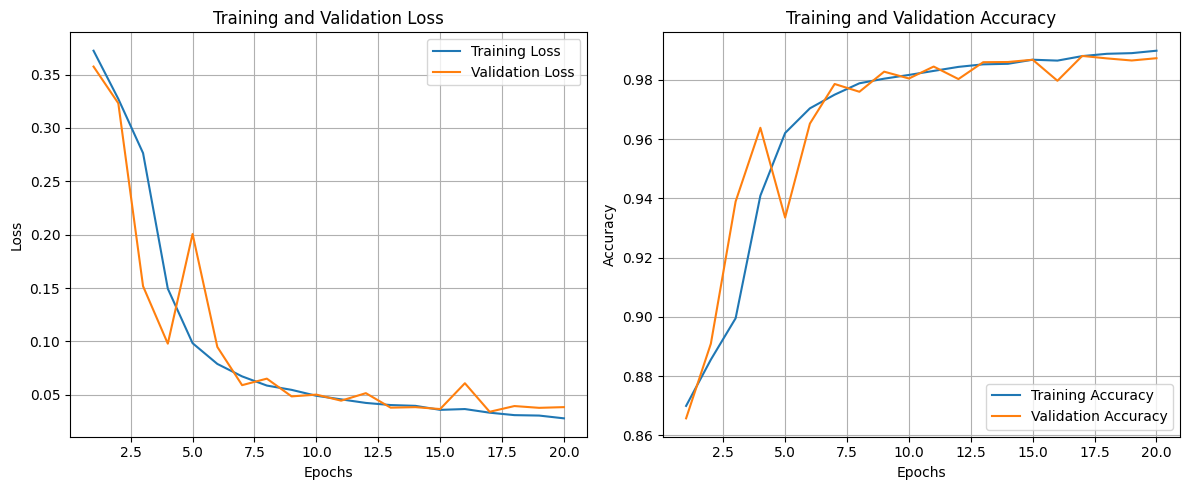

In [28]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 2s 3ms/step
Test f1_score : 95.07%


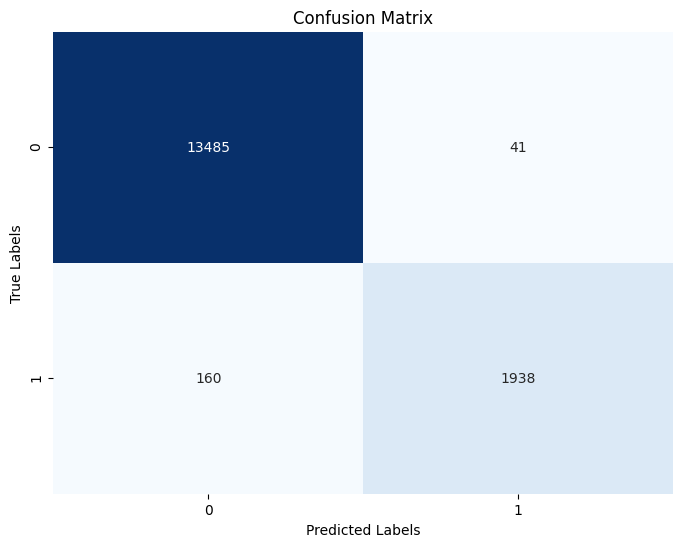

In [29]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 3

In [30]:
data_train_3 = pd.read_csv("..\\data set final\\spliting data\\train part_3.csv")
data_train_3= data_train_3.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_3], axis=0)


In [31]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-308.643738,83.215111,2.954364,8.332104,-26.816509,-11.286063,-18.635324,-19.527489,-21.554918,...,-0.563854,-0.500548,-0.845772,-0.233547,-0.571065,-0.053734,-0.259196,-0.319193,-0.840743,-0.763966
1,fake,-310.996826,57.916641,25.628843,19.340755,-5.469358,-22.178640,-20.736998,-14.935734,-16.973501,...,0.040916,0.646060,-0.053480,0.573642,0.231950,0.255590,-0.005893,0.176042,-0.355937,-0.045967
2,fake,-306.295959,89.043877,-6.858664,3.503150,-16.578819,-16.020960,-21.935347,-18.716463,-20.753521,...,-0.522520,-0.361891,-0.192657,-0.209379,-0.070371,-0.050636,-0.413034,-0.434269,-0.744069,-0.815403
3,fake,-313.401459,63.778816,10.261693,18.548100,-13.508071,-21.944349,-24.997660,-19.249523,-15.355844,...,-0.570126,0.455397,-0.044332,-0.133767,0.141274,0.072082,-0.565503,-0.363769,-1.225913,-0.507618
4,fake,-303.068939,85.139900,7.263174,16.590250,-18.455631,-19.695097,-19.672819,-23.731651,-25.065147,...,0.248072,0.700632,0.029145,-0.399052,-0.318387,0.286265,0.390015,0.708596,-0.313497,-0.987726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-303.508881,86.918114,6.485849,12.966057,-22.584835,-13.504972,-17.808092,-23.548670,-6.711785,...,-0.226041,0.671800,0.184781,-0.123190,-0.037162,-0.015786,0.156054,0.510832,-0.480891,-0.598828
24995,fake,-315.150543,88.879684,28.162432,13.807763,-20.472918,-13.742289,-20.095938,-17.051079,-10.948071,...,0.192212,-0.132928,-0.676986,-0.205914,-0.229710,-0.119125,-0.320406,-0.252448,-0.225826,-0.726772
24996,fake,-309.837097,78.124657,10.123403,13.911850,-22.984152,-17.145981,-10.856640,-23.756233,-21.400150,...,0.079518,0.216212,0.026279,-0.390636,-0.391021,0.276065,0.197087,0.772830,-0.312833,-1.128292
24997,real,-288.160461,90.827049,-2.201686,27.474916,-17.959169,-19.910725,-8.145932,-32.517422,-14.257210,...,-0.414773,-1.342326,-1.257056,-1.352663,-0.479101,-0.502604,-1.475382,0.018489,-0.894501,-1.332719


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)



callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
2344/2344 [==============================] - 22s 9ms/step - loss: 0.3495 - accuracy: 0.8770 - val_loss: 0.3564 - val_accuracy: 0.8716
Epoch 2/20
2344/2344 [==============================] - 21s 9ms/step - loss: 0.3053 - accuracy: 0.8926 - val_loss: 0.2219 - val_accuracy: 0.9181
Epoch 3/20
2344/2344 [==============================] - 21s 9ms/step - loss: 0.1635 - accuracy: 0.9360 - val_loss: 0.1312 - val_accuracy: 0.9518
Epoch 4/20
2344/2344 [==============================] - 21s 9ms/step - loss: 0.1120 - accuracy: 0.9543 - val_loss: 0.0984 - val_accuracy: 0.9614
Epoch 5/20
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0884 - accuracy: 0.9652 - val_loss: 0.0691 - val_accuracy: 0.9720
Epoch 6/20
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0646 - accuracy: 0.9756 - val_loss: 0.0556 - val_accuracy: 0.9804
Epoch 7/20
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0524 - accuracy: 0.9798 - val_loss: 0.0468 - val_ac

In [33]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 2s - loss: 0.0293 - accuracy: 0.9891 - 2s/epoch - 4ms/step
Test Accuracy: 98.91%


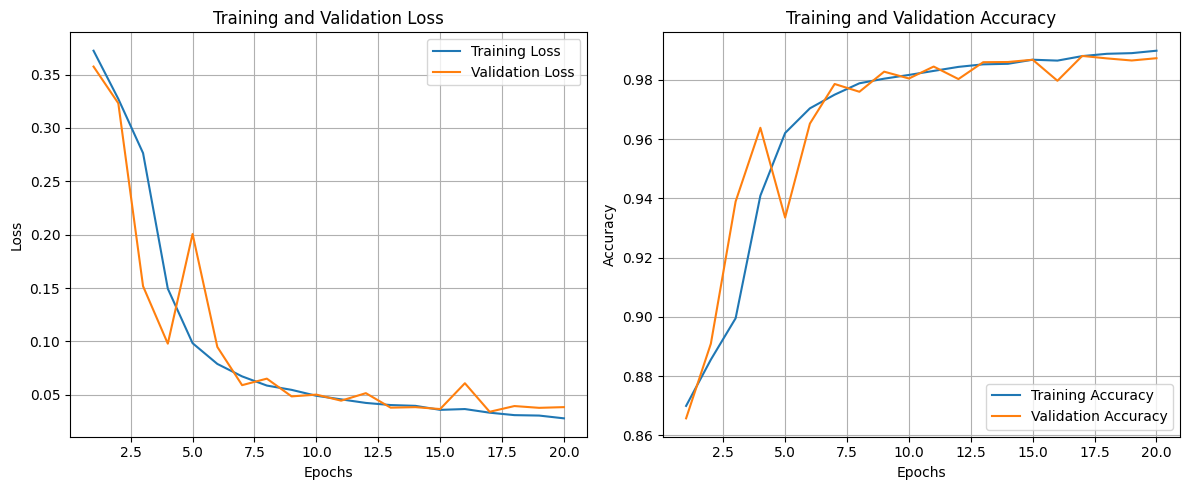

In [34]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 2s 3ms/step
Test f1_score : 95.95%


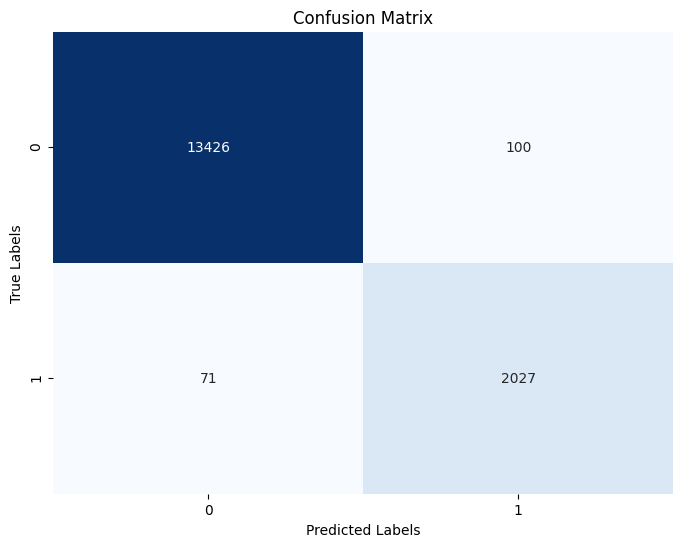

In [35]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 4

In [36]:
data_train_4 = pd.read_csv("..\\data set final\\spliting data\\train part_4.csv")
data_train_4= data_train_4.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_4], axis=0)

#data_train['label']=label_encoder.transform(data_train['label'])

In [37]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-308.643738,83.215111,2.954364,8.332104,-26.816509,-11.286063,-18.635324,-19.527489,-21.554918,...,-0.563854,-0.500548,-0.845772,-0.233547,-0.571065,-0.053734,-0.259196,-0.319193,-0.840743,-0.763966
1,fake,-310.996826,57.916641,25.628843,19.340755,-5.469358,-22.178640,-20.736998,-14.935734,-16.973501,...,0.040916,0.646060,-0.053480,0.573642,0.231950,0.255590,-0.005893,0.176042,-0.355937,-0.045967
2,fake,-306.295959,89.043877,-6.858664,3.503150,-16.578819,-16.020960,-21.935347,-18.716463,-20.753521,...,-0.522520,-0.361891,-0.192657,-0.209379,-0.070371,-0.050636,-0.413034,-0.434269,-0.744069,-0.815403
3,fake,-313.401459,63.778816,10.261693,18.548100,-13.508071,-21.944349,-24.997660,-19.249523,-15.355844,...,-0.570126,0.455397,-0.044332,-0.133767,0.141274,0.072082,-0.565503,-0.363769,-1.225913,-0.507618
4,fake,-303.068939,85.139900,7.263174,16.590250,-18.455631,-19.695097,-19.672819,-23.731651,-25.065147,...,0.248072,0.700632,0.029145,-0.399052,-0.318387,0.286265,0.390015,0.708596,-0.313497,-0.987726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,real,-365.017517,139.947250,-0.103617,63.773777,-7.109491,-9.147738,-12.791658,-9.236267,-11.327663,...,-0.165986,-0.437675,0.058679,-0.278450,-0.424155,0.310185,0.155038,-0.400337,-0.515071,-0.683003
24995,fake,-328.039124,80.029869,2.755627,16.737896,-14.727553,-15.699663,-20.626255,-17.457972,-10.000778,...,-0.782733,-0.562030,-0.927928,-0.441446,-0.804579,-0.677999,-0.764975,-0.700916,-1.029225,-0.872123
24996,fake,-324.625336,78.547829,10.076119,13.564253,-18.760702,-20.574505,-21.282104,-21.543192,-24.231346,...,-0.114199,-0.256481,-0.074792,0.010385,-0.141518,0.022060,-0.065198,-0.303315,-0.931794,-0.632047
24997,fake,-320.825256,79.878510,5.710485,22.618448,-18.556946,-27.836514,-15.390814,-18.140631,-17.168947,...,0.206627,0.241248,0.105919,-0.309278,-0.275200,0.012908,-0.803564,-0.561460,-0.379214,-0.969837


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)



callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
3125/3125 [==============================] - 29s 9ms/step - loss: 0.3516 - accuracy: 0.8759 - val_loss: 0.2387 - val_accuracy: 0.9093
Epoch 2/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.1480 - accuracy: 0.9402 - val_loss: 0.1026 - val_accuracy: 0.9603
Epoch 3/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0944 - accuracy: 0.9629 - val_loss: 0.0691 - val_accuracy: 0.9739
Epoch 4/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0648 - accuracy: 0.9756 - val_loss: 0.0493 - val_accuracy: 0.9809
Epoch 5/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0501 - accuracy: 0.9809 - val_loss: 0.0480 - val_accuracy: 0.9821
Epoch 6/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0424 - accuracy: 0.9839 - val_loss: 0.0459 - val_accuracy: 0.9830
Epoch 7/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0370 - accuracy: 0.9865 - val_loss: 0.0363 - val_ac

In [39]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 2s - loss: 0.0268 - accuracy: 0.9910 - 2s/epoch - 4ms/step
Test Accuracy: 99.10%


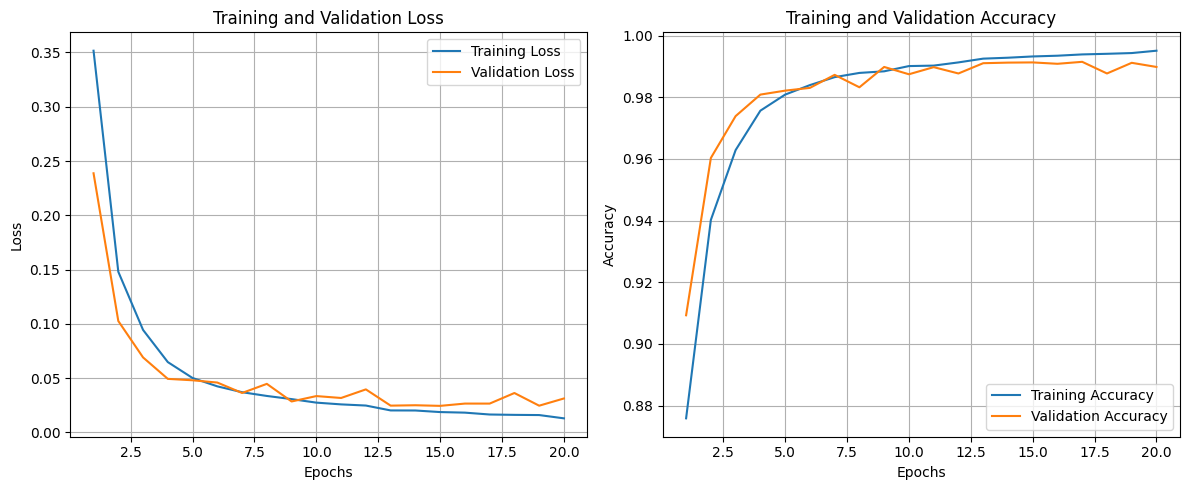

In [40]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 2s 3ms/step
Test f1_score : 96.70%


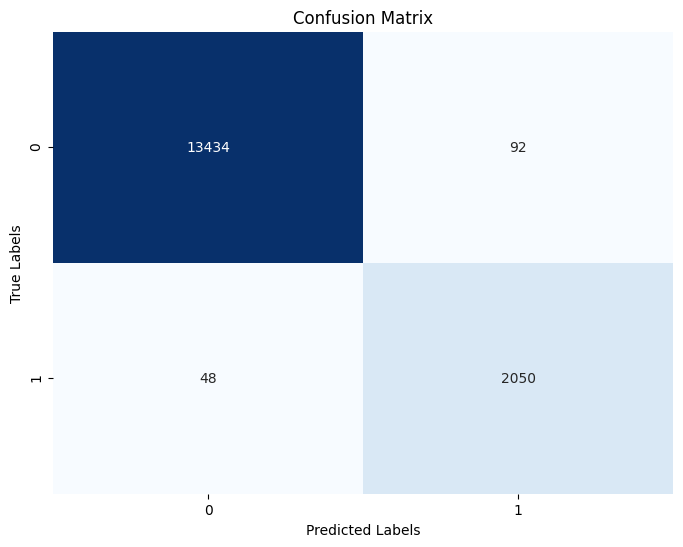

In [41]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 5

In [42]:
data_train_5 = pd.read_csv("..\\data set final\\spliting data\\train part_5.csv")
data_train_5= data_train_5.sample(frac=1).reset_index(drop=True)
#data_train['label']=label_encoder.transform(data_train['label'])
data_train=pd.concat([data_train, data_train_5], axis=0)

In [43]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-308.643738,83.215111,2.954364,8.332104,-26.816509,-11.286063,-18.635324,-19.527489,-21.554918,...,-0.563854,-0.500548,-0.845772,-0.233547,-0.571065,-0.053734,-0.259196,-0.319193,-0.840743,-0.763966
1,fake,-310.996826,57.916641,25.628843,19.340755,-5.469358,-22.178640,-20.736998,-14.935734,-16.973501,...,0.040916,0.646060,-0.053480,0.573642,0.231950,0.255590,-0.005893,0.176042,-0.355937,-0.045967
2,fake,-306.295959,89.043877,-6.858664,3.503150,-16.578819,-16.020960,-21.935347,-18.716463,-20.753521,...,-0.522520,-0.361891,-0.192657,-0.209379,-0.070371,-0.050636,-0.413034,-0.434269,-0.744069,-0.815403
3,fake,-313.401459,63.778816,10.261693,18.548100,-13.508071,-21.944349,-24.997660,-19.249523,-15.355844,...,-0.570126,0.455397,-0.044332,-0.133767,0.141274,0.072082,-0.565503,-0.363769,-1.225913,-0.507618
4,fake,-303.068939,85.139900,7.263174,16.590250,-18.455631,-19.695097,-19.672819,-23.731651,-25.065147,...,0.248072,0.700632,0.029145,-0.399052,-0.318387,0.286265,0.390015,0.708596,-0.313497,-0.987726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,fake,-307.152161,55.612095,-11.009701,20.982738,-15.200145,-17.916994,-23.441893,-22.218567,-19.477922,...,0.108583,-0.398431,-0.246669,0.161033,-0.267599,0.236904,-0.010819,-0.193565,-0.175018,-0.297705
24996,fake,-298.540009,99.047302,-1.710029,13.998638,-10.961274,-22.002151,-17.129814,-20.497187,-19.535816,...,-0.139597,0.286238,0.085114,-0.579415,-0.813115,-0.266213,0.193453,0.486984,-0.087352,-0.643979
24997,fake,-314.275360,73.096725,10.391687,29.166649,-13.630770,-25.688709,-25.679335,-16.298321,-14.238147,...,0.448872,0.196319,-0.134467,0.497992,0.121274,0.549276,-0.226924,0.420381,0.237593,-0.684124
24998,fake,-295.336823,69.597214,-3.047435,16.928583,-19.220446,-28.734058,-21.133057,-14.363135,-10.608668,...,0.134552,0.763629,0.138974,-0.176505,-0.522253,-0.243363,0.139719,0.952343,-0.131024,-0.937443


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)



callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
3907/3907 [==============================] - 34s 9ms/step - loss: 0.2325 - accuracy: 0.9123 - val_loss: 0.1396 - val_accuracy: 0.9405
Epoch 2/20
3907/3907 [==============================] - 33s 8ms/step - loss: 0.1079 - accuracy: 0.9560 - val_loss: 0.0674 - val_accuracy: 0.9732
Epoch 3/20
3907/3907 [==============================] - 33s 8ms/step - loss: 0.0601 - accuracy: 0.9774 - val_loss: 0.0441 - val_accuracy: 0.9835
Epoch 4/20
3907/3907 [==============================] - 33s 8ms/step - loss: 0.0434 - accuracy: 0.9839 - val_loss: 0.0369 - val_accuracy: 0.9868
Epoch 5/20
3907/3907 [==============================] - 33s 8ms/step - loss: 0.0351 - accuracy: 0.9867 - val_loss: 0.0310 - val_accuracy: 0.9892
Epoch 6/20
3907/3907 [==============================] - 33s 8ms/step - loss: 0.0310 - accuracy: 0.9883 - val_loss: 0.0267 - val_accuracy: 0.9910
Epoch 7/20
3907/3907 [==============================] - 33s 8ms/step - loss: 0.0269 - accuracy: 0.9904 - val_loss: 0.0312 - val_ac

In [45]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 2s - loss: 0.0263 - accuracy: 0.9922 - 2s/epoch - 4ms/step
Test Accuracy: 99.22%


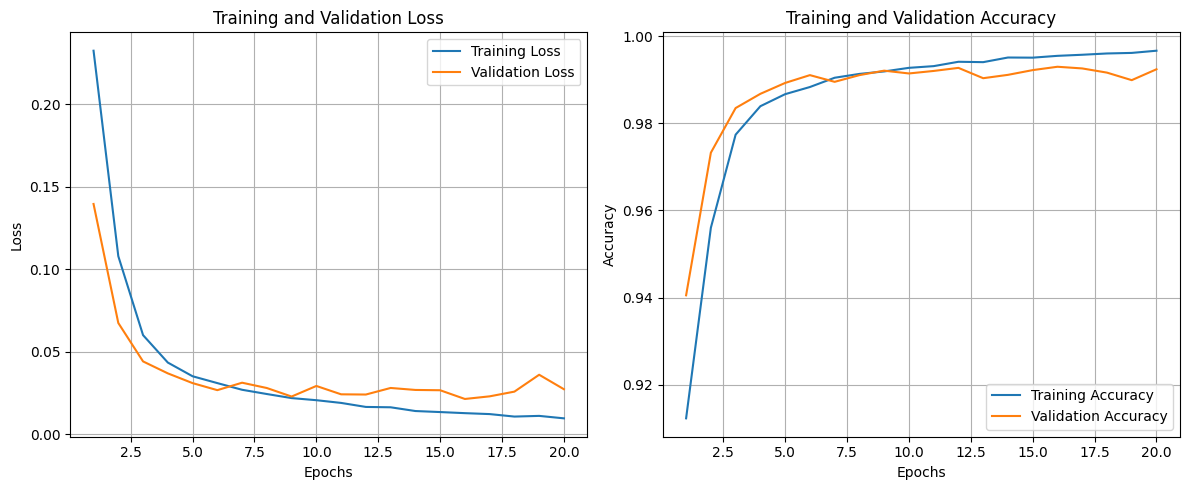

In [46]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 2s 3ms/step
Test f1_score : 97.09%


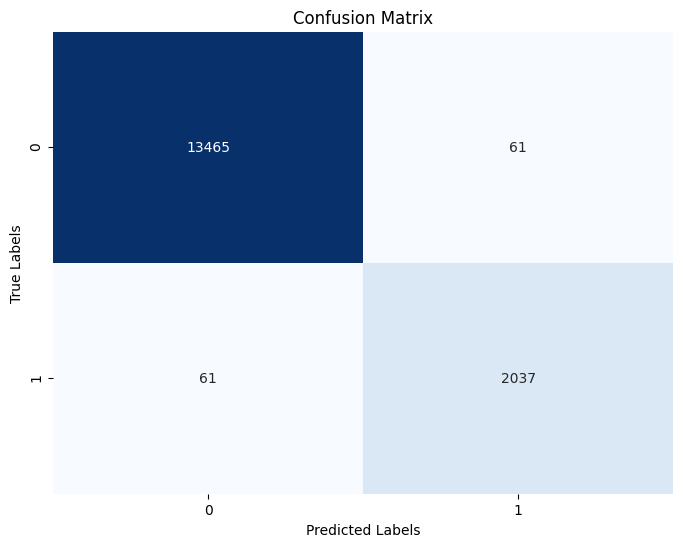

In [47]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#################################################################

In [48]:
import joblib


In [49]:
joblib.dump(model, 'ljspeech_full_band_melgan.pkl')

INFO:tensorflow:Assets written to: ram://d0073a37-8c73-40cf-8786-dba2ef342550/assets


INFO:tensorflow:Assets written to: ram://d0073a37-8c73-40cf-8786-dba2ef342550/assets


['ljspeech_full_band_melgan.pkl']

In [50]:
#build the model
model.save('ljspeech_full_band_melgan.h5')
#to call the model
#New_Model = tf.keras.models.load_model('my_model.h5')